# Solving the OneMax Problem with Parallel Hill Climbing Algorithm

In this project I code a population-based variant of basic Hill Climbing algorithm to solve a OneMax problem. Due to its simplicity, the OneMax problem is a useful baseline to test performance of algorithms in the AI field of Search and Optimisation. 

By finding a solution with ones only, e.g., "111111" we know that the algorithm found an optimal solution for the problem. 

### Tools

In [1]:
# Libraries

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Algorithm

In [2]:
# Custom functions for the algorithm

def generate_random_bitstring(length):
    """Generates a bitstring with random combination of 0s and 1s.
    
    Arguments:
    -----------
    length (int): number of bits in the generated bitstring

    Returns:
    -----------
    bitstring (np.array)    
    """

    return [random.randint(0,1) for _ in range(int(length))]


def bitflip_mutation(bitstring, p):
    """Perform mutation on a bitstring according to probability (p) of the mutation occuring.

    Arguments:
    ----------
    bitstring (np.array): a candidate solution to be mutated
    p (float): probability of mutation

    Returns:
    ----------
    mutated bitstring (np.array)
    """
    
    return [bit if random.random() >= p else 1-bit for bit in bitstring]  


def evaluate_fitness(bitstring):
    """Sum the number of ones in the bitstring.

    Arguments:
    ----------
    bitstring (np.array): a candidate solution for the OneMax problem

    Returns:
    ----------
    fitness score (int)
    """

    return sum(bitstring)


def parallel_hill_climbing(generations, L, population, p):
    """Use Parallel Hill Climbing algorithm to solve OneMax problem.

    Arguments:
    ---------
    generations (int): max number of generations for the search
    L (int): length of a bitstring for the OneMax problem (problem/solution size)
    population (int): number of solutions evolved in parallel
    p (float): probability of mutation

    Returns:
    ---------
    A triplet:
    - the best individual solution found in the search 
    - its fitness score 
    - a history of the best fitness scores in the population of solutions across all generations
    """

    # Start with the initial population of solutions and fitness values
    initial_population = [generate_random_bitstring(L) for solution in range(int(population))]
    
    # Initiate best solutions, their fitnesses and best_fitness_history 
    best_solutions = initial_population
    initial_fitness_scores = [evaluate_fitness(solution) for solution in best_solutions]
    best_fitness_history = [max(initial_fitness_scores)]

    # Main Search: loop until no improvement is found:
    for generation in range(1, generations + 1):
        
        # Perform mutation of the best_solutions
        mutated_solutions = [bitflip_mutation(solution, p=p) for solution in best_solutions]

        # Create a combined population of best_solutions and mutated_solutions
        combined_population = np.concatenate([best_solutions, mutated_solutions])
    
        # Obtain fitness scores for the combined_population
        combined_population_scores = [evaluate_fitness(solution) for solution in combined_population]

        # Select only the best solutions from the combined_population sorted indirectly in an ascending order
        best_indices = np.argsort(combined_population_scores)[-population:]  
        best_solutions = [combined_population[i] for i in best_indices]

        # Update the history of best fitness scores
        best_fitness_history.append(max(combined_population_scores))
    
    # Choose the individual best solution from the final generation
    best_score_idx = int(best_indices[-1:][0])
    best_fitness_score = combined_population_scores[best_score_idx]
    best_individual_solution = combined_population[best_score_idx]
    
    return best_individual_solution, best_fitness_score, best_fitness_history

### Testing performance

First I test the algorithm with default parameters. For the initial run, I choose a problem size of 50 bits, I allow 100 generations to enable enough time for convergence; I set population size to 10 and mutation rate to 0.05, the latter being a heuristic choice offering just enough balance between exploration and exploitation.

Best solution found:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 

Best fitness score: 48



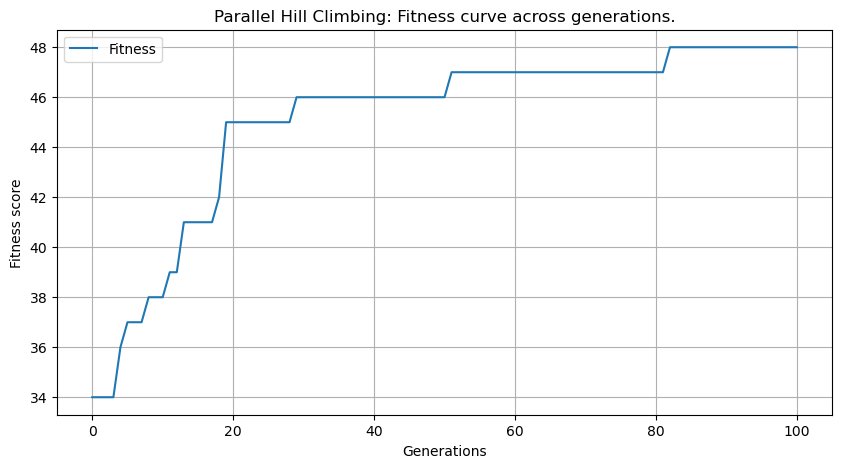

In [3]:
# Choice of parameters
generations = 100
bitstring_length = 50
population_size = 10
mutation_probability = 0.05

# Set seed for reproducibility
random.seed(1234)

# Test-run the algorithm
best_solution, best_fitness, fitness_history = parallel_hill_climbing(
    generations=generations, 
    L=bitstring_length, 
    population=population_size, 
    p=mutation_probability
)

print(
    f"Best solution found:\n{best_solution}",
    f"\n"
    f"\nBest fitness score: {best_fitness}\n"
)

# Plot fitness curve
plt.figure(figsize=(10, 5))
sns.lineplot(x=np.arange(generations + 1), y=fitness_history, label="Fitness")
plt.title("Parallel Hill Climbing: Fitness curve across generations.")
plt.xlabel("Generations")
plt.ylabel("Fitness score")
plt.xticks(x=range(0, generations, 10))
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

In the initial test run, the algorithm achieves a near optimal score of 48 with the highest progress in fitness evolution within the first 20 generations.  

Next, I test performance of the Parallel Hill Climbing on different bitstring lengths (problem size) by running the algorithm 10 times on each length. Averaged out results are then plotted.


Average best fitness score for 100 bits: 87.7



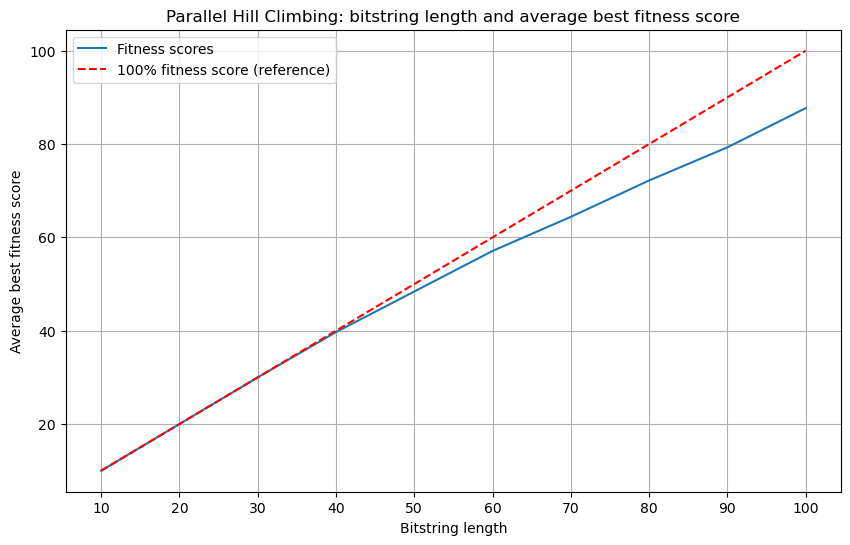

In [4]:
def test_parallel_hill_climber(bitstring_lengths, generations=100, population_size=10, runs=10):
    """Test performance of Parallel Hill Climbing algorithm on OneMax over repeated runs.
    Explore the algorithm's performance on varying lengths of the bitstring (10, 20, 30,... 90, 100).

    Returns:
    ---------
    A tuple:
    - average best fitness scores for each bitstring length
    - average fitness scores history for each bitstring length
    """

    avg_best_fitness_scores = []
    avg_fitness_history = []
    
    for length in bitstring_lengths:
    
        best_scores_per_length = []
        fitness_history_sum = np.zeros(generations + 1)
        
        # Run the algorithm specified number of times
        for _ in range(runs):
            _, test_best_score, test_fitness_history = parallel_hill_climbing(
                generations=generations,
                L=length, 
                population=population_size, 
                p=0.05
            )
    
            # Data from each test run
            best_scores_per_length.append(test_best_score)
            fitness_history_sum += np.array(test_fitness_history)

        # Averages for each length
        avg_best_fitness_scores.append(np.mean(best_scores_per_length))
        avg_fitness_history.append(fitness_history_sum / runs)

    return avg_best_fitness_scores, avg_fitness_history


# Test run the algorithm and unpack data for plotting
bitstring_lengths = np.linspace(10, 100, 10)
avg_best_fitness_scores, avg_fitness_scores_history = test_parallel_hill_climber(bitstring_lengths)

# Print stats
print(
    f"\nAverage best fitness score for 100 bits: {np.mean(avg_best_fitness_scores[-1:])}\n"
)

# Plot data
plt.figure(figsize=(10, 6))
sns.lineplot(x=bitstring_lengths, y=avg_best_fitness_scores, label=f"Fitness scores")
sns.lineplot(x=bitstring_lengths, y=bitstring_lengths, label="100% fitness score (reference)",
             linestyle='--', color='red')
plt.title("Parallel Hill Climbing: bitstring length and average best fitness score")
plt.xlabel("Bitstring length")
plt.ylabel("Average best fitness score")
plt.xticks(bitstring_lengths)
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

When run with a population of 10 solutions and probability of mutation set to 0.05, the Parallel Hill Climbing algorithm easily finds optimal solutions for smaller problem sizes (10 to 40-bit-long bitstring). From around that point, the algorithm's performance gradually degrades, on average scoring approximately 85-90 for the bitstring with 100 bits. 

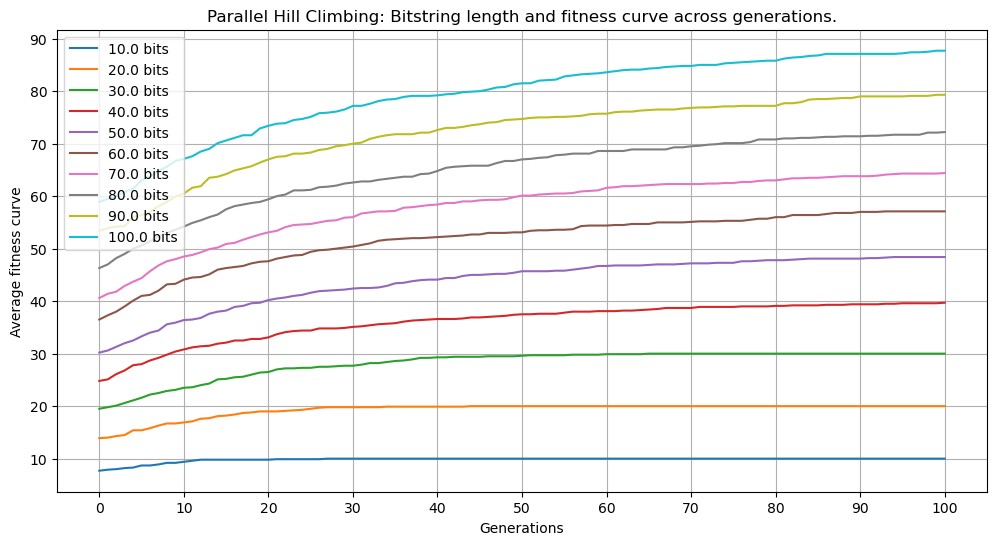

In [5]:
plt.figure(figsize=(12, 6))

for length, fitness in zip(bitstring_lengths, avg_fitness_scores_history):
    sns.lineplot(x=np.arange(generations + 1), y=fitness, label=f"{length} bits")

plt.title("Parallel Hill Climbing: Bitstring length and fitness curve across generations.")
plt.xlabel("Generations")
plt.ylabel("Average fitness curve")
plt.xticks(np.arange(0, generations + 1, 10))
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

When looking on the averaged out fitness curves for all bitstring lengths, we can observe a clear pattern of larger number of generations required to converge. I run the algorithm on 1000 generations to explore if this makes convergence possible in larger problem sizes: 

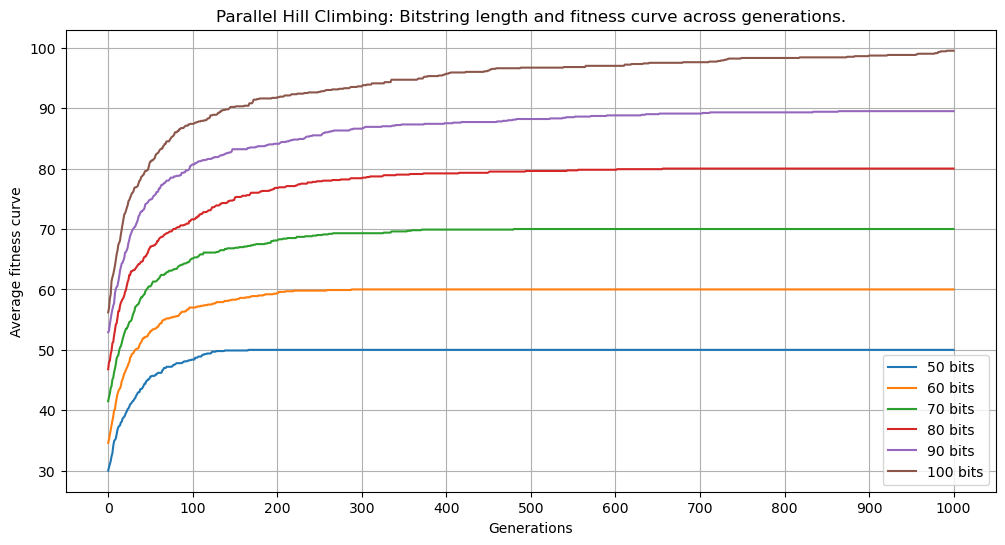

In [6]:
# Choice of parameters
more_generations = 1000
longer_bitstrings = [50,60,70,80,90,100]

# test-run the algorithm
avg_best_fitness_scores, avg_fitness_scores_history = test_parallel_hill_climber(
    bitstring_lengths=longer_bitstrings,
    generations = more_generations    
)

plt.figure(figsize=(12, 6))

for length, fitness in zip(longer_bitstrings, avg_fitness_scores_history):
    sns.lineplot(x=np.arange(more_generations + 1), y=fitness, label=f"{length} bits")

plt.title("Parallel Hill Climbing: Bitstring length and fitness curve across generations.")
plt.xlabel("Generations")
plt.ylabel("Average fitness curve")
plt.xticks(np.arange(0, more_generations + 1, 100))
plt.legend()
plt.grid(True)
plt.show()

**Observations:**

Despite of running the algorithm for 1000 generations, it is unable to converge for the 100-bit-long bitstring. This shows the algorithm's  inefficiency in finding optimal solutions for larger problems (100 and above). 
  

In the second test, I explore the effect of different population sizes on the algorithm's performance.

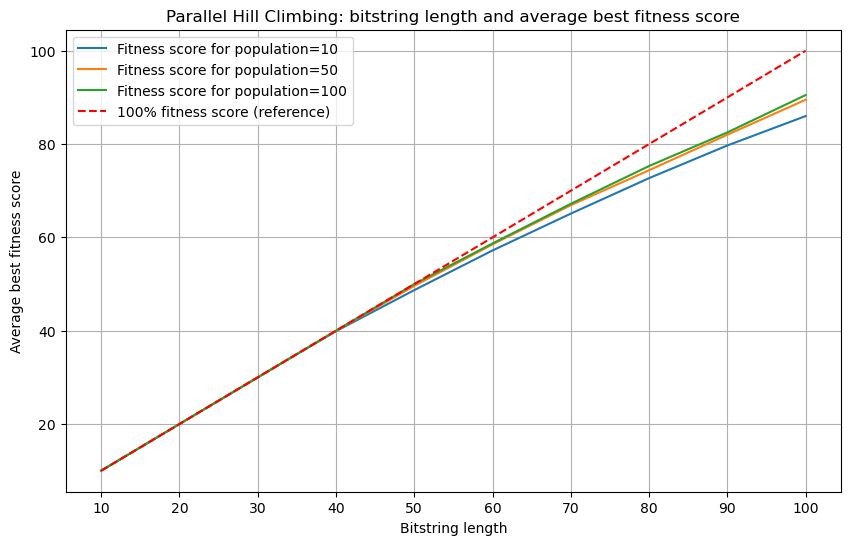

In [7]:
# Parameters choice
population_sizes = [10, 50, 100]

# Test-run the algorithm and plot average scores for each population size
plt.figure(figsize=(10, 6))

for size in population_sizes:
    avg_best_fitness_scores, _ = test_parallel_hill_climber(
        population_size=size,
        bitstring_lengths=bitstring_lengths,
        generations=100        
    )
    sns.lineplot(x=np.linspace(10, 100, 10), y=avg_best_fitness_scores, label=f"Fitness score for population={size}")

sns.lineplot(x=np.linspace(10, 100, 10), y=np.linspace(10, 100, 10), label="100% fitness score (reference)",
             linestyle='--', color='red')
plt.title("Parallel Hill Climbing: bitstring length and average best fitness score")
plt.xlabel("Bitstring length")
plt.ylabel("Average best fitness score")
plt.xticks(np.linspace(10, 100, 10))
plt.legend()
plt.grid(True)
plt.show()

**Conclusions:**

Population size has only a limited influence over performance of the algorithm in the explored range of problem sizes. It is possible that exploring an adaptive schedule for mutation rate could improve average fitness score, e.g., dependent on diversity of population or time the algorithm runs. However, the overall tendency of degrading performance is quite clear, as observed from around 40-bit-long bitstrings. Other, more efficient algorithms would be appropriate, e.g., Genetic Algorithms. 